In [1]:
import matplotlib.pyplot as plt
from gensim.models import Word2Vec, KeyedVectors
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from itertools import product
from tqdm import tqdm
import sys
sys.path.append('../src')
from models import open_pickle

In [25]:
#MODEL_NAME = 'glove.840B'
MODEL_NAME = 'glove_fall2020paper'
we_model_load = KeyedVectors.load(f'../data/interim/{MODEL_NAME}_norm', mmap='r')
RESULTS_FILEPATH = f'../data/interim/{MODEL_NAME}_association_metric_exps.pickle'
EXPERIMENT_DEFINITION_FILEPATH = f'../data/interim/{MODEL_NAME}_experiment_definitions.pickle'
IMAGE_SAVE_FILEPATH = f'../reports/figures/{MODEL_NAME}_exp_results.png'
NONRELATIVE_IMAGE_SAVE_FILEPATH = f'../reports/figures/{MODEL_NAME}_nonrelative_exp_results.png'
BASIC_DISTS_FILEPATH = f'../reports/figures/{MODEL_NAME}_basicdists.png'

exp_def_dict = open_pickle(EXPERIMENT_DEFINITION_FILEPATH)
results_dict = open_pickle(RESULTS_FILEPATH)

In [3]:
def add_axes_obj_labels(ax, exp_num, target_label, A_label, B_label, n_samples):
    TITLE_FONT_SIZE = 12
    [target_label, A_label, B_label] = [s.upper() for s in [target_label, A_label, B_label]]
    ax.set_title(f'#{exp_num}: {target_label} terms: {B_label} (left) vs. {A_label} (right)',
                fontsize=TITLE_FONT_SIZE)
    ax.set_xlabel(f'Bias Regions: CI with {n_samples} samples')
    ax.set_ylabel(f'Word')
    ax.yaxis.set_ticklabels([])

In [4]:
def annotate_points(ax, terms, x_array, y):
    POINT_FONT_SIZE = 9
    for i, txt in enumerate(terms):
        ax.annotate(txt, (x_array[i], y[i]), fontsize=POINT_FONT_SIZE)

In [5]:
def add_scatters_and_lines(ax, arr, threshold,
                   mean, QR_dict, y):
    S = 20 # Marker size
    ZERO_LINE_COLOR = 'lime'
    POINT_COLOR = 'red'
    PERCENTILES_COLOR = 'blue'
    SHADE_DARKNESS = 0.2
    SHADE_DARKNESS_80CI = 0.1
    SHADE_DARKNESS_90CI = 0.15
    SHADE_DARKNESS_95CI = 0.25
    CI_COLOR = 'black'
    XAXIS_LIMIT = 0.2
    
    y = [i for i in range(1,len(arr)+1)]
    QR_95 = QR_dict['QR_95']
    ax.scatter(arr, y, c=POINT_COLOR, s=S)
    ax.xaxis.grid()
    ax.axvspan(QR_95[0], QR_95[1], alpha=SHADE_DARKNESS, COLOR=CI_COLOR)
    #ax.axvline(threshold_second, color=POINT_COLOR, linestyle='-.', label='threshold')
    #ax.axvline(-threshold_second, color=POINT_COLOR, linestyle='-.')
    #ax.axvline(mean_second, c=POINT_COLOR, label='second-order mean')
    #ax.axvspan(lower_bound, upper_bound, alpha=SHADE_DARKNESS, color=PERCENTILES_COLOR)
    #ax.axvspan(ST1_80CI[0], ST1_80CI[1], alpha=SHADE_DARKNESS_80CI, color=CI_COLOR)
    #ax.axvspan(ST1_90CI[0], ST1_90CI[1], alpha=SHADE_DARKNESS_90CI, color=CI_COLOR)
    #ax.axvspan(ST1_95CI[0], ST1_95CI[1], alpha=SHADE_DARKNESS_95CI, color=CI_COLOR)
    #ax.axvspan(pct_5_second, pct_95_second, alpha=SHADE_DARKNESS, color=PERCENTILES_COLOR)
    ax.set_xlim(-XAXIS_LIMIT, XAXIS_LIMIT)

In [6]:
results_dict[1]['second']['all_biases']

array([ 0.02233699,  0.05133399,  0.03598312, ..., -0.0337104 ,
       -0.02023131, -0.04834495], dtype=float32)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 56.06it/s]
No handles with labels found to put in legend.


Rendering...


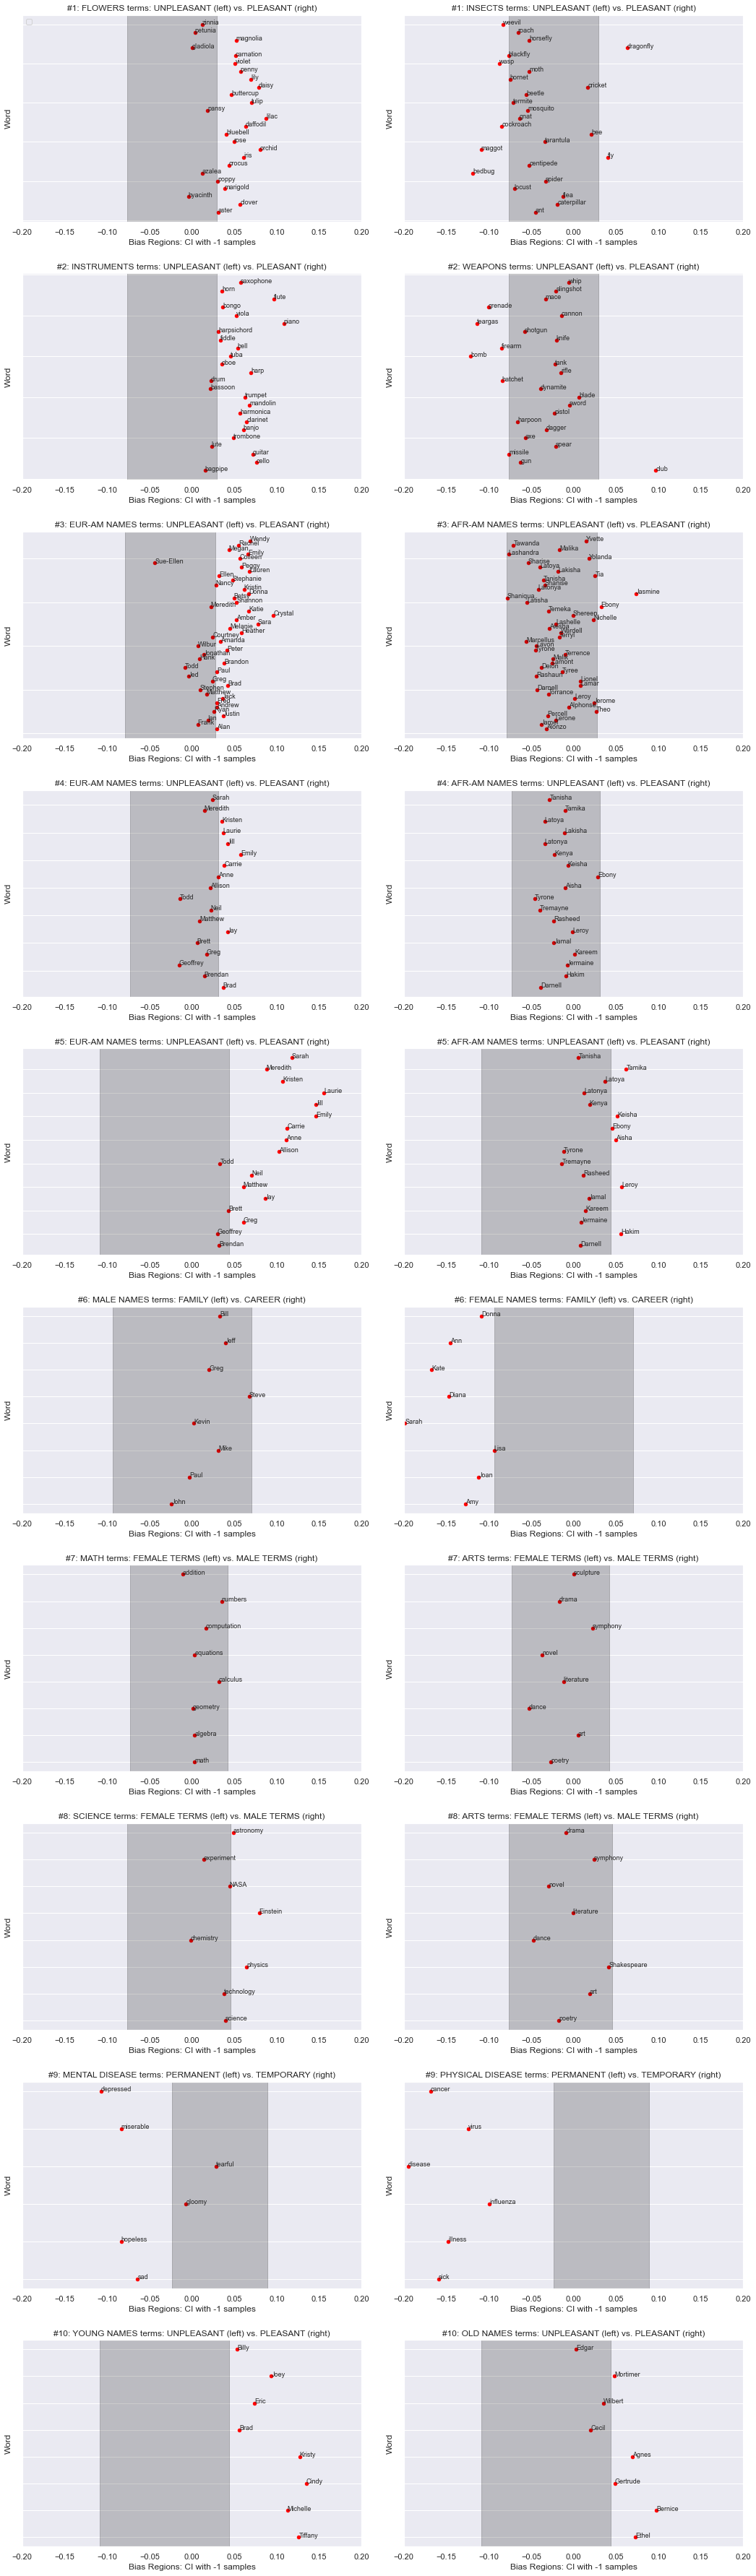

In [7]:
fig, axs = plt.subplots(10,2, figsize=(15,50))
LEGEND_SIZE = 10

exps = range(1,11)
target_letters = ['X','Y']
for exp_num, target_letter in tqdm(product(exps, target_letters), total=20):
    col = 0 if target_letter =='X' else 1
    ax = axs[exp_num-1, col]
    
    arr = results_dict[exp_num]['second'][f'{target_letter}_array']
    threshold = results_dict[exp_num]['second']['threshold']
    mean = results_dict[exp_num]['second'][f'{target_letter}_mean']
    n_samples = -1 #len(results_dict[exp_num]['second']['sigtest_dist_1'])
    y = [i for i in range(1,len(arr)+1)]
    terms = exp_def_dict[exp_num][f'{target_letter}_terms']
    target_label = exp_def_dict[exp_num][f'{target_letter}_label']
    A_label = exp_def_dict[exp_num]['A_label']
    B_label = exp_def_dict[exp_num]['B_label']
    QR_dict = results_dict[exp_num]['second']['QR_dict']
    
    
    add_scatters_and_lines(ax, arr, threshold,
                   mean, QR_dict, y)
    annotate_points(ax, terms, arr, y)
    add_axes_obj_labels(ax, exp_num, target_label, A_label, B_label, n_samples)
axs[0,0].legend(loc=2, prop={'size': LEGEND_SIZE})
fig.tight_layout(pad=2)
print('Rendering...')
plt.savefig(IMAGE_SAVE_FILEPATH)
plt.show()

# Basic Dists

In [71]:
def add_axes_obj_labels(ax):
    X_AXIS_FONT_SIZE = 20
    Y_AXIS_FONT_SIZE = 25
    TITLE_FONT_SIZE = 32
    XTICKLABEL_FONTSIZE = 20
    YTICKLABEL_FONTSIZE = 25
    LEGEND_FONTSIZE = 22
    ax.set_xlabel('left=bias towards Z\' (B), right=bias towards A (Z)',
                 fontsize=X_AXIS_FONT_SIZE)
    ax.set_ylabel(f'Experiment Number', fontsize=Y_AXIS_FONT_SIZE)
    ax.set_title('Bias Distributions ($D$)', fontsize=TITLE_FONT_SIZE)
    ax.tick_params(axis='x', labelsize=XTICKLABEL_FONTSIZE)
    ax.tick_params(axis='y', labelsize=YTICKLABEL_FONTSIZE)
    ax.legend(fontsize=LEGEND_FONTSIZE)

In [39]:
def set_font():
    # Say, "the default sans-serif font is COMIC SANS"
    matplotlib.rcParams['font.sans-serif'] = "Calibri"
    # Then, "ALWAYS use sans-serif fonts"
    matplotlib.rcParams['font.family'] = "sans-serif"

(200000,)


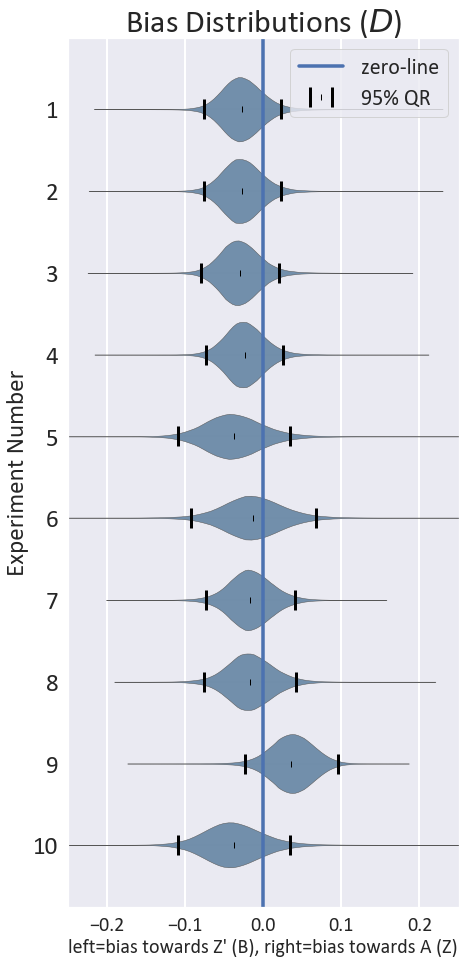

In [72]:
# Seaborn Violinplot
#fig, axs = plt.subplots(3,1, figsize=(15,30))
fig, ax = plt.subplots(1,1, figsize=(7,16))

X_AXIS_LIMITS = [-0.25, 0.25]
Y_AXIS_LIMITS = [11,0]
Y_ANNOTATION_OFFSET = -0.1
DISTS_COLOR = sns.desaturate('dodgerblue', 0.25)
#ERRORBAR_COLOR = sns.desaturate('darkorange', 0.8)
ERRORBAR_COLOR = 'black'

exp_nums = [i for i in range(1,11)]
    
biases = [np.random.choice(results_dict[exp_num]['second']['all_biases'], 200000) for exp_num in exp_nums]
y = [i-1 for i in range(1,11)]

means = [np.mean(results_dict[exp_num]['second'][f'allwords_mean']) for exp_num in exp_nums]
errors_95 = [results_dict[exp_num]['second']['allwords_mean'] - results_dict[exp_num]['second']['QR_dict']['QR_95'][0] for exp_num in exp_nums]

print(biases[0].shape)
df = pd.DataFrame(biases)
df['exp_num'] = df.index.values
df['exp_num'] = df['exp_num'] + 1
df = df.melt(id_vars=['exp_num'], var_name='sample_num', value_name='result_value')

ax = sns.violinplot(x='result_value', y='exp_num', data=df, ax=ax, orient='h',
                  saturation=1.2, inner=None, linewidth=0.5, color=DISTS_COLOR)
ax.errorbar(means, y, xerr=errors_95, fmt='|', color=ERRORBAR_COLOR, capsize=10, label='95% QR', elinewidth=0.01, capthick=3)

ax.axvline(0, label='zero-line', linestyle='-', linewidth=3.5)
ax.xaxis.grid(linewidth=2)
ax.set_xlim(X_AXIS_LIMITS)

add_axes_obj_labels(ax)
set_font()

plt.savefig(BASIC_DISTS_FILEPATH)

In [29]:
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))